In [1]:
import matplotlib as mpl
import seaborn as sbn
import numpy as np
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
import librosa as lb
import librosa.display as lbd
import soundfile as sf

EXPATH = "A:/Thesis/notebooks/data/Kaggle/Smart Bee Colony Monitor - Clips of Beehive Sounds/sound_files/sound_files/"
PATH = "A:/Thesis/data/cec/bombus/"
SAVE_PATH = "A:/Thesis/data/cec/edited/bombus/"


pd.set_option('display.max_colwidth', 200)
species = ['hortorum', 'lapidarius', 'muscorum', 'pascuorum', 'soroeensis', 'sylvarum', 'terrestris']

In [2]:
print(f"""
librosa: {lb.__version__}
soundfile: {sf.__version__}
seaborn: {sbn.__version__}
matplotlib: {mpl.__version__}
numpy: {np.__version__}
scikit-learn: {sk.__version__}
pandas: {pd.__version__}
""")


librosa: 0.10.0
soundfile: 0.12.1
seaborn: 0.12.2
matplotlib: 3.5.3
numpy: 1.21.6
scikit-learn: 1.0.2
pandas: 1.1.5



In [3]:
# data at: A:\Thesis\notebooks\data\Kaggle\Smart Bee Colony Monitor - Clips of Beehive Sounds\sound_files\sound_files
files = lb.util.find_files(PATH, ext=['wav'])
files = np.asarray(files)
files


array(['A:\\Thesis\\data\\cec\\bombus\\bombus_hortorum_worker\\16bits\\2020_08_12_hortorum_worker_1_1.wav',
       'A:\\Thesis\\data\\cec\\bombus\\bombus_hortorum_worker\\16bits\\2020_08_12_hortorum_worker_1_2.wav',
       'A:\\Thesis\\data\\cec\\bombus\\bombus_hortorum_worker\\2020_08_12_hortorum_worker_1_1.wav',
       ...,
       'A:\\Thesis\\data\\cec\\bombus\\bombus_terrestris_worker\\S1708W05_terrestris_6.wav',
       'A:\\Thesis\\data\\cec\\bombus\\bombus_terrestris_worker\\S1708W05_terrestris_7.wav',
       'A:\\Thesis\\data\\cec\\bombus\\bombus_terrestris_worker\\S1708W06_terrestris_1.wav'],
      dtype='<U103')

In [4]:
filenames = [f.split("\\")[-1] for f in files]
titles = [name.split('.')[0] for name in filenames]
extensions = [name.split('.')[1] for name in filenames]
durations = [lb.get_duration(path=f) for f in files]
is16Bit = ['16bits' in loc.split('\\') for loc in files]
matches = [filepath.split('\\')[5].split('_') for filepath in files]
species = [m[1] for m in matches]
caste = [m[2] for m in matches]
types = [('16 bits' if v else 'Original') for v in is16Bit]

In [5]:
df = pd.DataFrame({
    "title": titles,
    "extension": extensions,
    "species": species,
    "caste": caste,
    "type": types,
    "location": files,
    "duration (s)": durations,
})
df

title extension     species   caste  \
0         2020_08_12_hortorum_worker_1_1       wav    hortorum  worker   
1         2020_08_12_hortorum_worker_1_2       wav    hortorum  worker   
2         2020_08_12_hortorum_worker_1_1       wav    hortorum  worker   
3         2020_08_12_hortorum_worker_1_2       wav    hortorum  worker   
4     00_2020_08_02_lapidarius_male_11_1       wav  lapidarius    male   
...                                  ...       ...         ...     ...   
1107               S1708W05_terrestris_4       wav  terrestris  worker   
1108               S1708W05_terrestris_5       wav  terrestris  worker   
1109               S1708W05_terrestris_6       wav  terrestris  worker   
1110               S1708W05_terrestris_7       wav  terrestris  worker   
1111               S1708W06_terrestris_1       wav  terrestris  worker   

          type  \
0      16 bits   
1      16 bits   
2     Original   
3     Original   
4     Original   
...        ...   
1107  Original   
1108  Original   
1109  Original   
1110  Original   
1111  Original   

                                                                                        location  \
0     A:\Thesis\data\cec\bombus\bombus_hortorum_worker\16bits\2020_08_12_hortorum_worker_1_1.wav   
1     A:\Thesis\data\cec\bombus\bombus_hortorum_worker\16bits\2020_08_12_hortorum_worker_1_2.wav   
2            A:\Thesis\data\cec\bombus\bombus_hortorum_worker\2020_08_12_hortorum_worker_1_1.wav   
3            A:\Thesis\data\cec\bombus\bombus_hortorum_worker\2020_08_12_hortorum_worker_1_2.wav   
4        A:\Thesis\data\cec\bombus\bombus_lapidarius_male\00_2020_08_02_lapidarius_male_11_1.wav   
...                                                                                          ...   
1107                A:\Thesis\data\cec\bombus\bombus_terrestris_worker\S1708W05_terrestris_4.wav   
1108                A:\Thesis\data\cec\bombus\bombus_terrestris_worker\S1708W05_terrestris_5.wav   
1109                A:\Thesis\data\cec\bombus\bombus_terrestris_worker\S1708W05_terrestris_6.wav   
1110                A:\Thesis\data\cec\bombus\bombus_terrestris_worker\S1708W05_terrestris_7.wav   
1111                A:\Thesis\data\cec\bombus\bombus_terrestris_worker\S1708W06_terrestris_1.wav   

      duration (s)  
0        10.192000  
1         0.631188  
2        10.192000  
3         0.631188  
4         0.399333  
...            ...  
1107      1.830437  
1108      0.817333  
1109      1.116229  
1110     18.494667  
1111      0.579542  

[1112 rows x 7 columns]

In [6]:
df = df[(df['type'] != '16 bits')]
df = df.sort_values(by="duration (s)", ascending=True).reset_index(drop=True)
df

title extension     species   caste      type  \
0      2020_08_06_terrestris_male_4_2       wav  terrestris    male  Original   
1    2020_08_03_terrestris_worker_9_2       wav  terrestris  worker  Original   
2               S1408W07_terrestris_3       wav  terrestris  worker  Original   
3      2020_08_06_terrestris_male_6_3       wav  terrestris    male  Original   
4    2020_08_03_terrestris_worker_9_3       wav  terrestris  worker  Original   
..                                ...       ...         ...     ...       ...   
551  2020_08_02_terrestris_worker_5_4       wav  terrestris  worker  Original   
552             S1208W02_terrestris_4       wav  terrestris  worker  Original   
553    2020_08_12_hortorum_worker_1_1       wav    hortorum  worker  Original   
554             S1708W05_terrestris_7       wav  terrestris  worker  Original   
555            S1208W03_terrestris_12       wav  terrestris  worker  Original   

                                                                                    location  \
0        A:\Thesis\data\cec\bombus\bombus_terrestris_male\2020_08_06_terrestris_male_4_2.wav   
1    A:\Thesis\data\cec\bombus\bombus_terrestris_worker\2020_08_03_terrestris_worker_9_2.wav   
2               A:\Thesis\data\cec\bombus\bombus_terrestris_worker\S1408W07_terrestris_3.wav   
3        A:\Thesis\data\cec\bombus\bombus_terrestris_male\2020_08_06_terrestris_male_6_3.wav   
4    A:\Thesis\data\cec\bombus\bombus_terrestris_worker\2020_08_03_terrestris_worker_9_3.wav   
..                                                                                       ...   
551  A:\Thesis\data\cec\bombus\bombus_terrestris_worker\2020_08_02_terrestris_worker_5_4.wav   
552             A:\Thesis\data\cec\bombus\bombus_terrestris_worker\S1208W02_terrestris_4.wav   
553      A:\Thesis\data\cec\bombus\bombus_hortorum_worker\2020_08_12_hortorum_worker_1_1.wav   
554             A:\Thesis\data\cec\bombus\bombus_terrestris_worker\S1708W05_terrestris_7.wav   
555            A:\Thesis\data\cec\bombus\bombus_terrestris_worker\S1208W03_terrestris_12.wav   

     duration (s)  
0        0.076125  
1        0.089542  
2        0.096542  
3        0.099604  
4        0.101187  
..            ...  
551      2.387333  
552      5.622167  
553     10.192000  
554     18.494667  
555     93.150667  

[556 rows x 7 columns]

In [7]:
def amplitude_vs_time(data=df, title="amplitude vs. time", filter = False, start_index = 0, end_index = 20, coeff = 3, save=False):
    plt.figure(figsize=(25, 10))
    for i in range(start_index, min(len(data), end_index)):
        signal, sampling_rate = lb.load(data.loc[i, 'location'])
        if filter:
            abs_signal = np.abs(signal)
            median = np.median(abs_signal)
            std = np.std(abs_signal)
            threshold = median + coeff * std
            mask = abs_signal > threshold
            signal[mask] = 0
            if save:
                sf.write(f"{SAVE_PATH}/{data.loc[i, 'species']}/{data.loc[i, 'caste']}/{data.loc[i, 'title']} - EDITED.wav", data=signal, samplerate=sampling_rate, subtype='PCM_24')
        lbd.waveshow(signal, sr=sampling_rate, label=f"sample {i+1} ({data.loc[i, 'species']} - {data.loc[i, 'caste']})")            
    plt.legend()
    plt.title(f'\n{title}\n')
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.ylabel("\nAmplitude (m)\n\n")
    plt.xlabel("\n\nTime (s)\n")
    plt.show()

In [8]:
df.loc[5]

title                                                                2020_08_17_sylvarum_worker_2_7
extension                                                                                       wav
species                                                                                    sylvarum
caste                                                                                        worker
type                                                                                       Original
location        A:\Thesis\data\cec\bombus\bombus_sylvarum_worker\2020_08_17_sylvarum_worker_2_7.wav
duration (s)                                                                                 0.1025
Name: 5, dtype: object

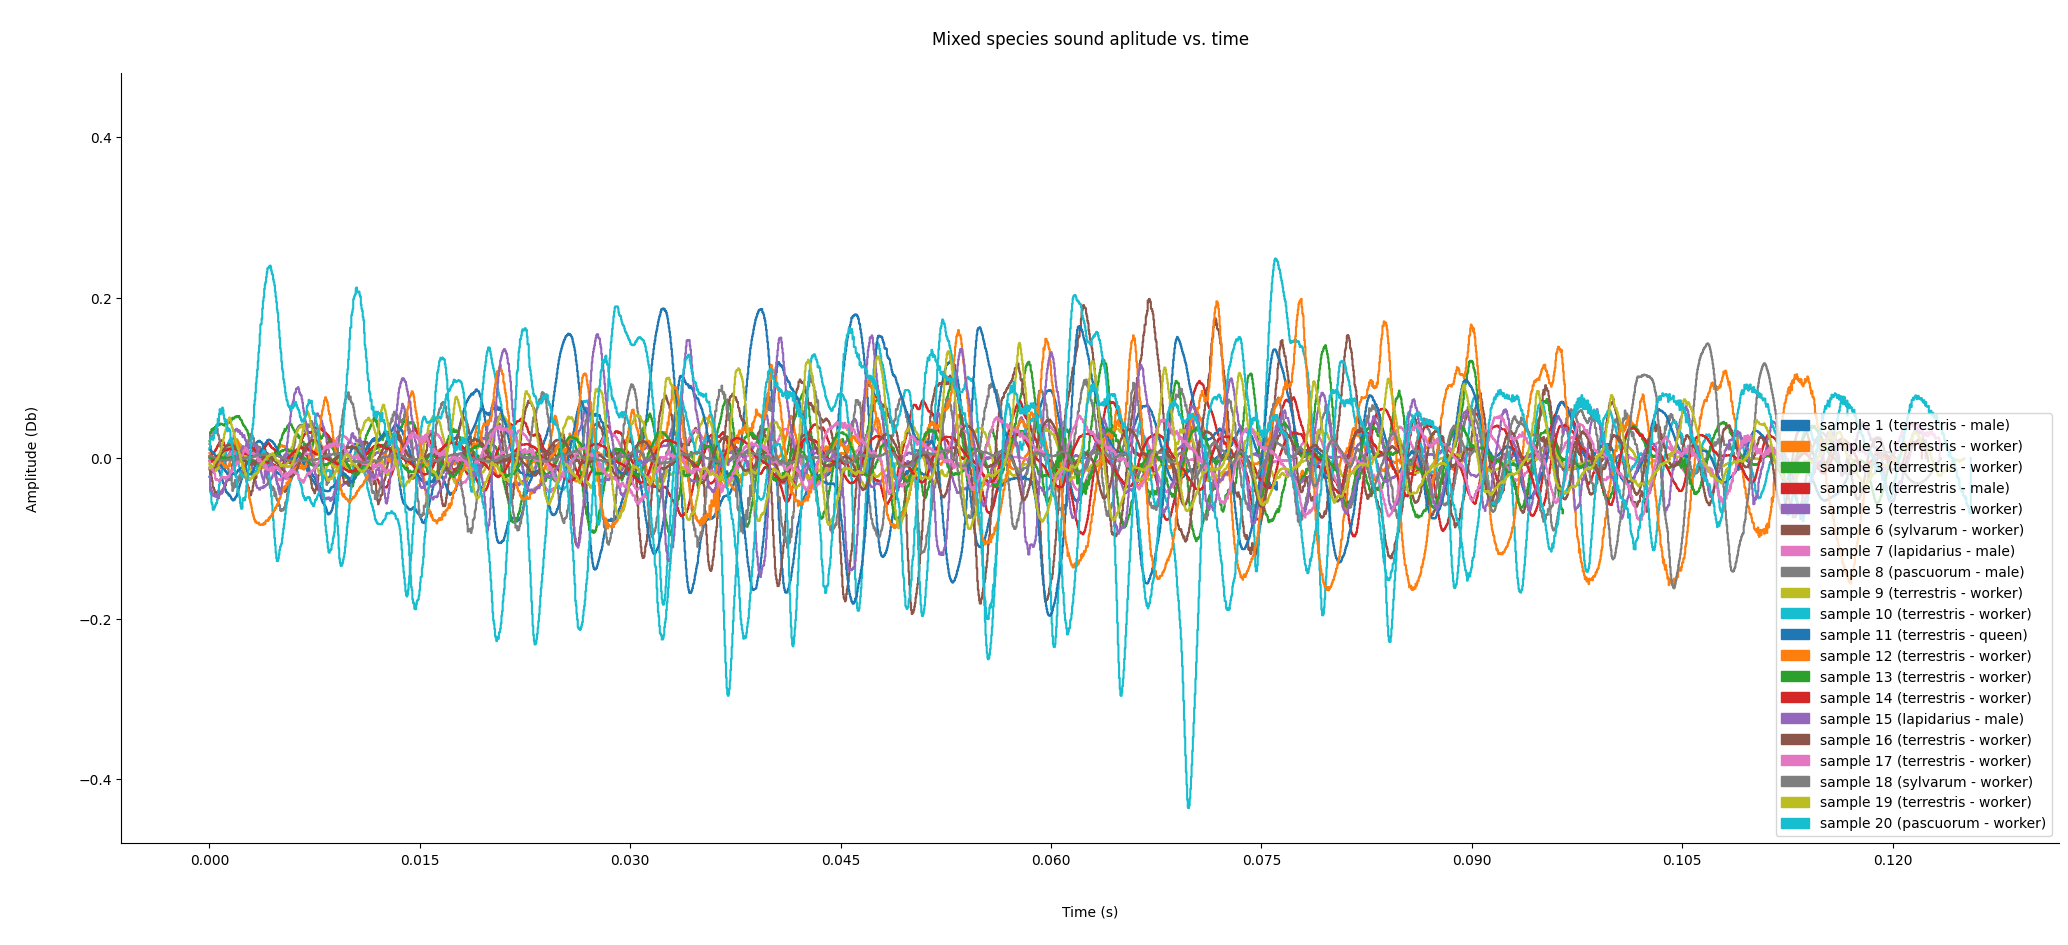

In [9]:
amplitude_vs_time(title="Mixed species sound aplitude vs. time")

In [10]:
df_terrestris = df[(df['species'] == 'terrestris')].reset_index(drop=True)
df_hortorum = df[(df['species'] == 'hortorum')].reset_index(drop=True)
df_lapidarius = df[(df['species'] == 'lapidarius')].reset_index(drop=True)
df_muscorum = df[(df['species'] == 'muscorum')].reset_index(drop=True)
df_pascuorum = df[(df['species'] == 'pascuorum')].reset_index(drop=True)
df_soroeensis = df[(df['species'] == 'soroeensis')].reset_index(drop=True)
df_sylvarum = df[(df['species'] == 'sylvarum')].reset_index(drop=True)

In [11]:
df_terrestris

title extension     species   caste      type  \
0      2020_08_06_terrestris_male_4_2       wav  terrestris    male  Original   
1    2020_08_03_terrestris_worker_9_2       wav  terrestris  worker  Original   
2               S1408W07_terrestris_3       wav  terrestris  worker  Original   
3      2020_08_06_terrestris_male_6_3       wav  terrestris    male  Original   
4    2020_08_03_terrestris_worker_9_3       wav  terrestris  worker  Original   
..                                ...       ...         ...     ...       ...   
316                                11       wav  terrestris  worker  Original   
317  2020_08_02_terrestris_worker_5_4       wav  terrestris  worker  Original   
318             S1208W02_terrestris_4       wav  terrestris  worker  Original   
319             S1708W05_terrestris_7       wav  terrestris  worker  Original   
320            S1208W03_terrestris_12       wav  terrestris  worker  Original   

                                                                                    location  \
0        A:\Thesis\data\cec\bombus\bombus_terrestris_male\2020_08_06_terrestris_male_4_2.wav   
1    A:\Thesis\data\cec\bombus\bombus_terrestris_worker\2020_08_03_terrestris_worker_9_2.wav   
2               A:\Thesis\data\cec\bombus\bombus_terrestris_worker\S1408W07_terrestris_3.wav   
3        A:\Thesis\data\cec\bombus\bombus_terrestris_male\2020_08_06_terrestris_male_6_3.wav   
4    A:\Thesis\data\cec\bombus\bombus_terrestris_worker\2020_08_03_terrestris_worker_9_3.wav   
..                                                                                       ...   
316                                A:\Thesis\data\cec\bombus\bombus_terrestris_worker\11.wav   
317  A:\Thesis\data\cec\bombus\bombus_terrestris_worker\2020_08_02_terrestris_worker_5_4.wav   
318             A:\Thesis\data\cec\bombus\bombus_terrestris_worker\S1208W02_terrestris_4.wav   
319             A:\Thesis\data\cec\bombus\bombus_terrestris_worker\S1708W05_terrestris_7.wav   
320            A:\Thesis\data\cec\bombus\bombus_terrestris_worker\S1208W03_terrestris_12.wav   

     duration (s)  
0        0.076125  
1        0.089542  
2        0.096542  
3        0.099604  
4        0.101187  
..            ...  
316      2.356438  
317      2.387333  
318      5.622167  
319     18.494667  
320     93.150667  

[321 rows x 7 columns]

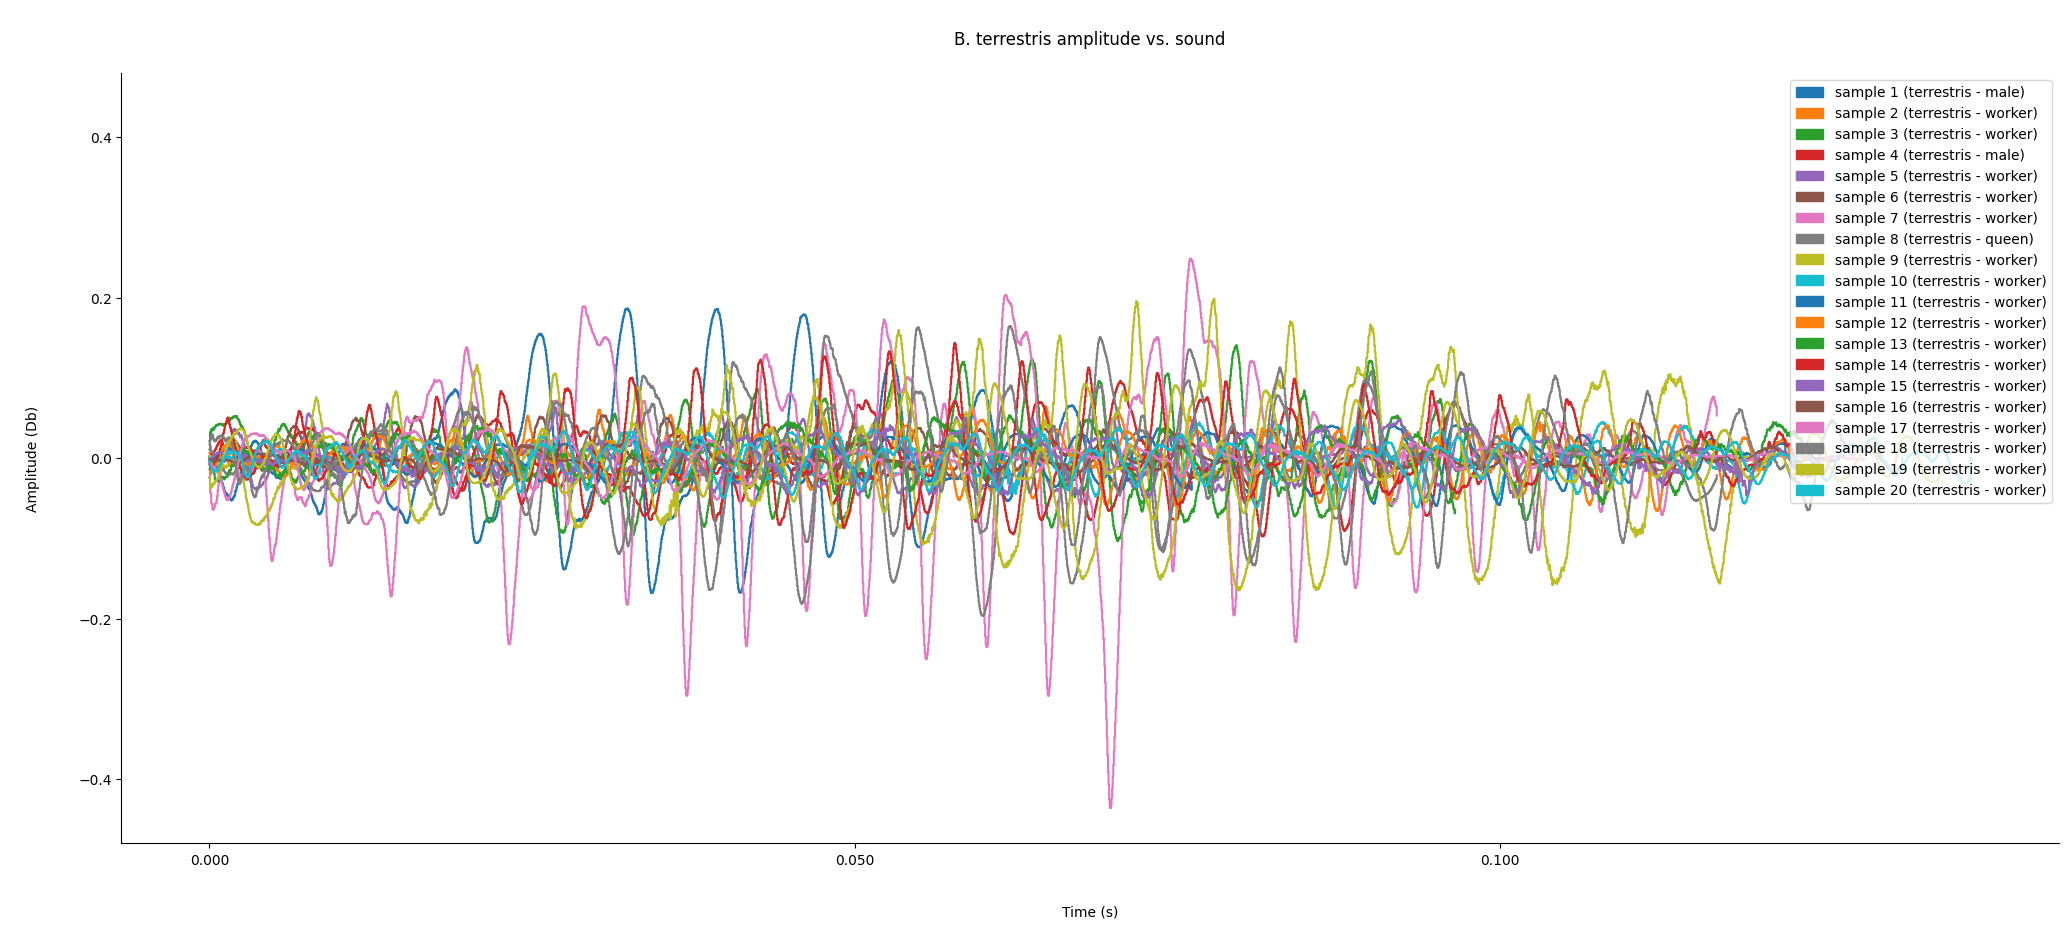

In [12]:
amplitude_vs_time(df_terrestris, title="B. terrestris amplitude vs. sound")

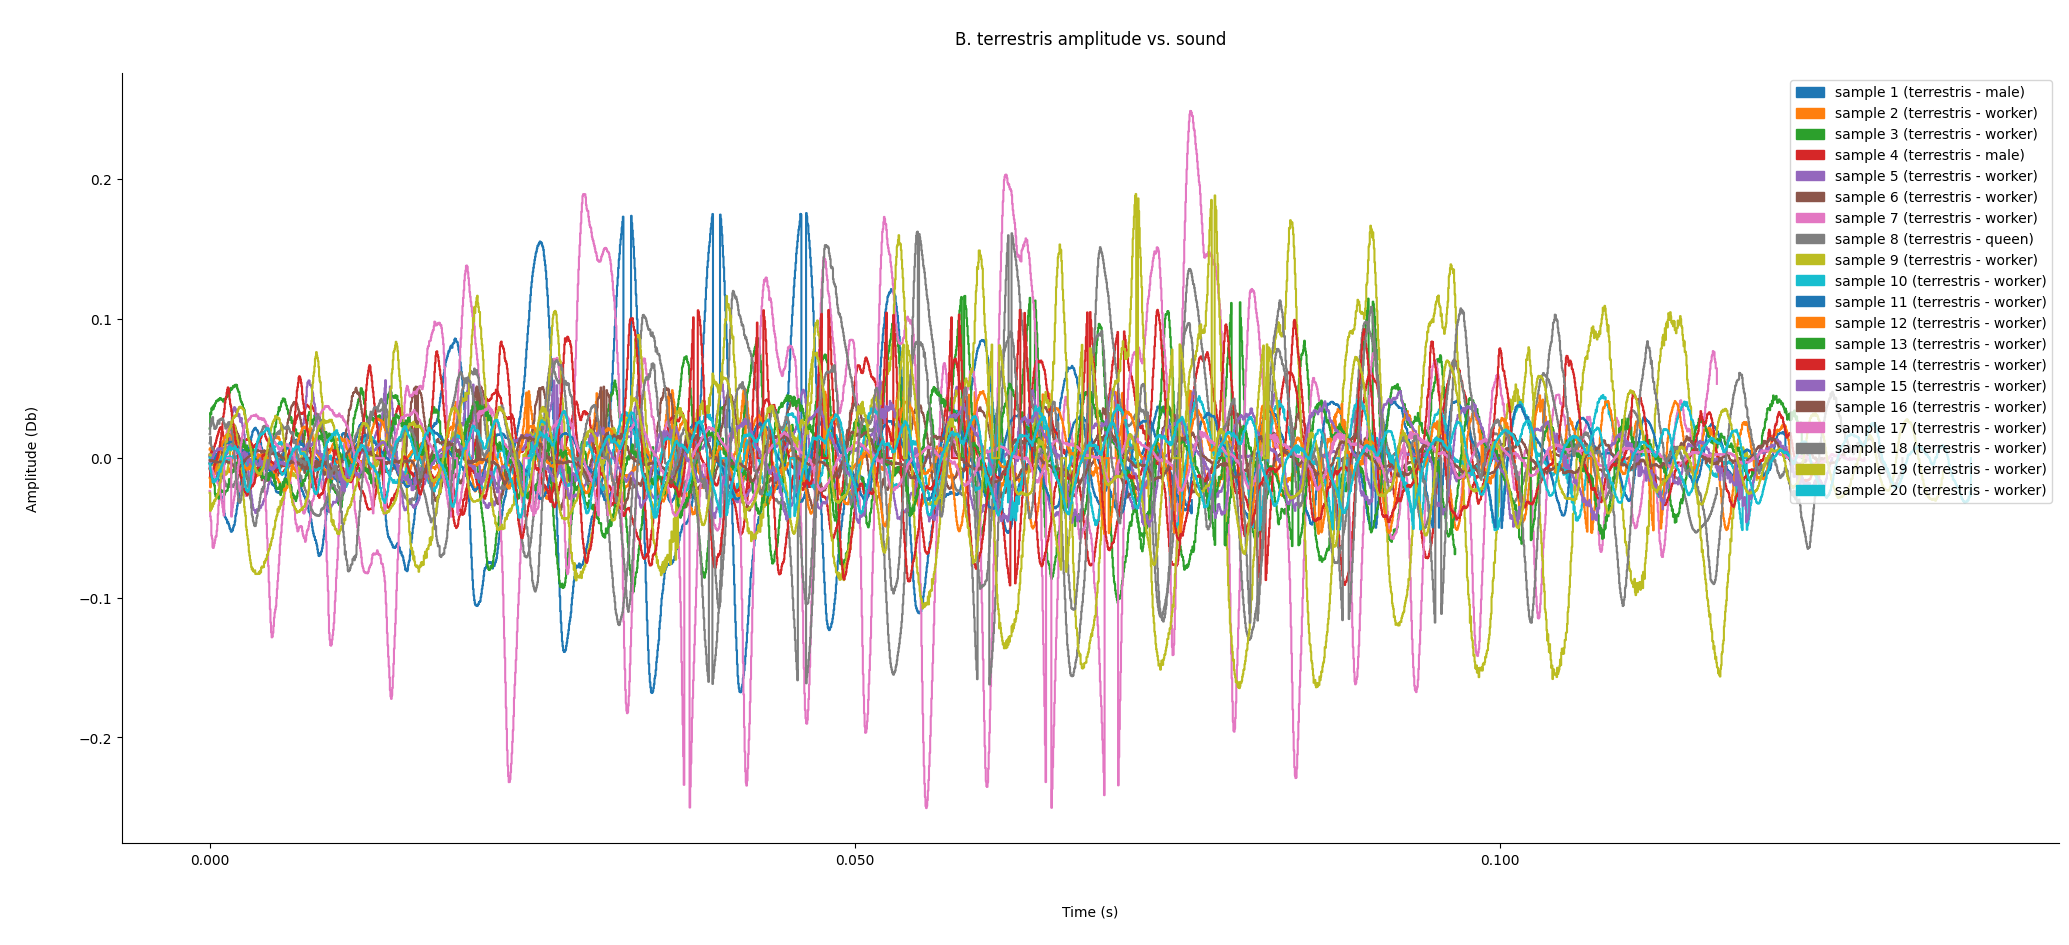

In [13]:
amplitude_vs_time(df_terrestris, title="B. terrestris amplitude vs. sound", filter=True, coeff=3)

In [14]:
df_hortorum

title extension   species   caste      type  \
0  2020_08_12_hortorum_worker_1_2       wav  hortorum  worker  Original   
1  2020_08_12_hortorum_worker_1_1       wav  hortorum  worker  Original   

                                                                              location  \
0  A:\Thesis\data\cec\bombus\bombus_hortorum_worker\2020_08_12_hortorum_worker_1_2.wav   
1  A:\Thesis\data\cec\bombus\bombus_hortorum_worker\2020_08_12_hortorum_worker_1_1.wav   

   duration (s)  
0      0.631188  
1     10.192000

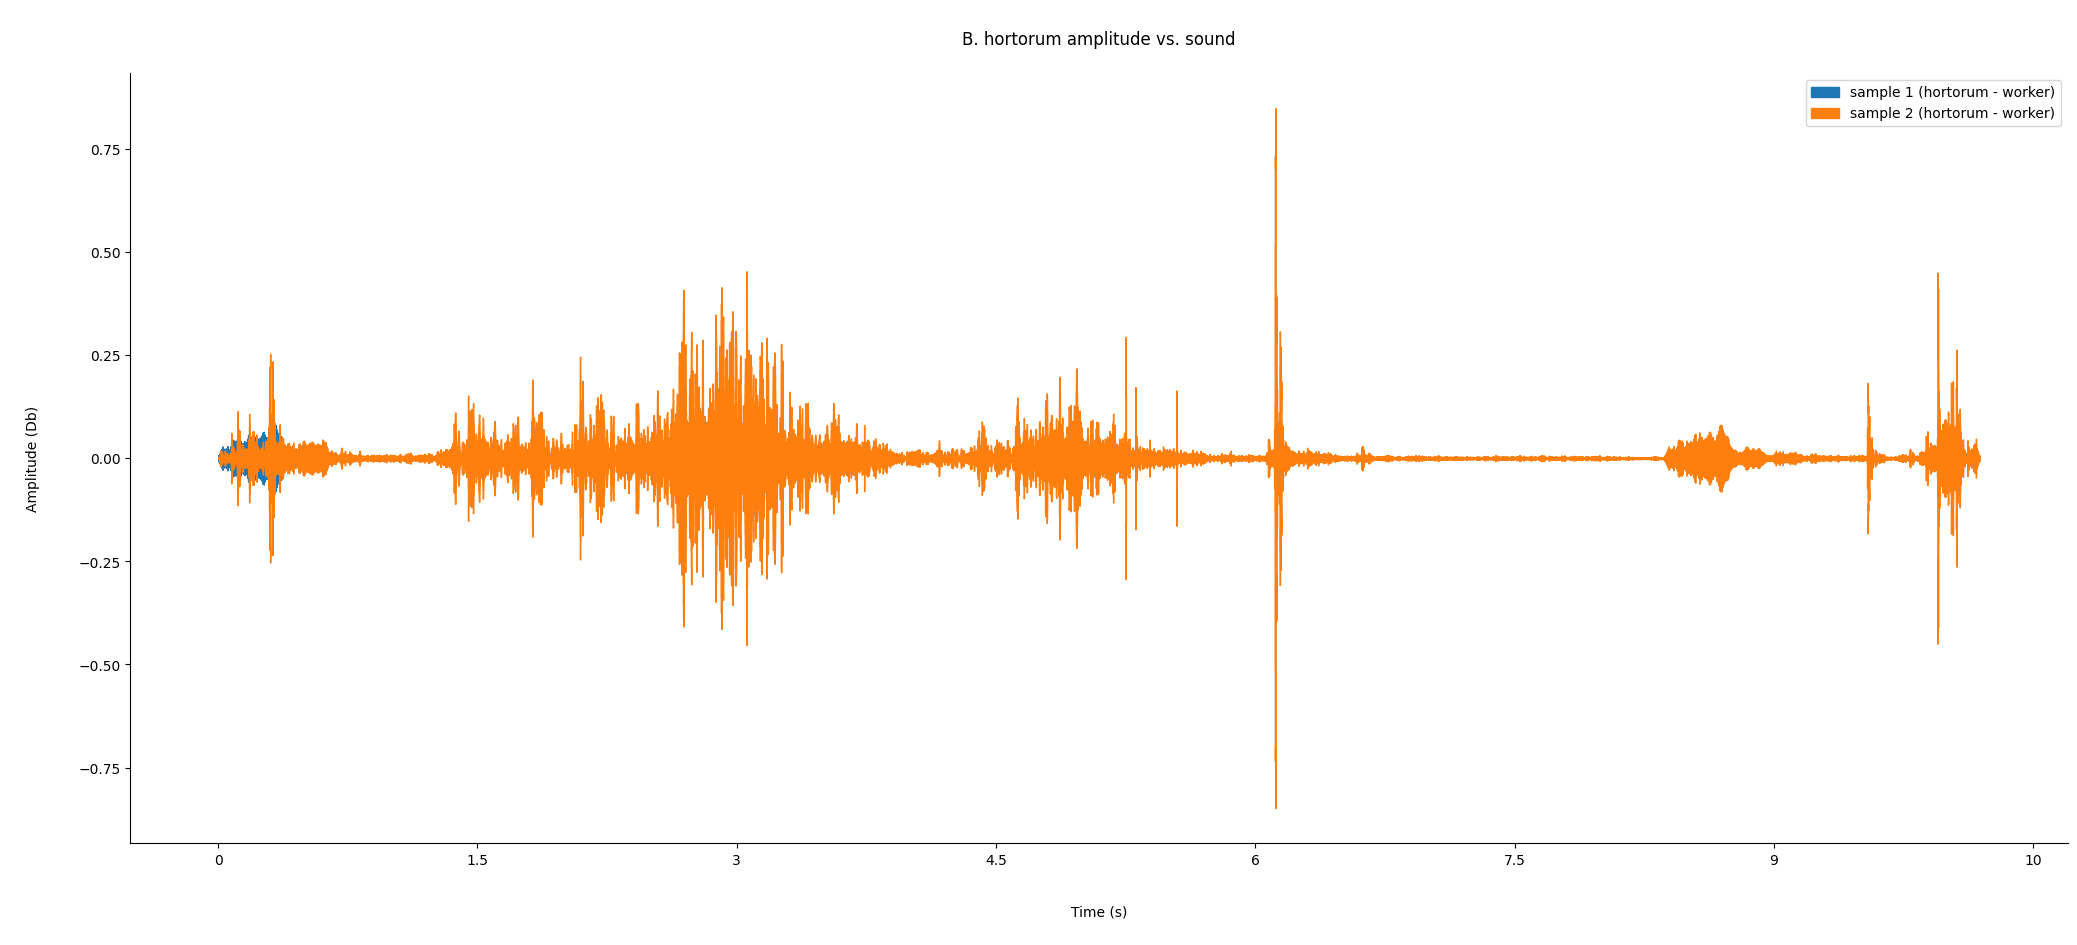

In [15]:
amplitude_vs_time(df_hortorum, title="B. hortorum amplitude vs. sound")

In [16]:
df_lapidarius

title extension     species   caste  \
0    00_2020_08_02_lapidarius_male_5_2       wav  lapidarius    male   
1       2020_08_06_lapidarius_male_7_1       wav  lapidarius    male   
2       2020_08_02_lapidarius_male_5_1       wav  lapidarius    male   
3     2020_08_03_lapidarius_worker_1_2       wav  lapidarius  worker   
4       2020_08_06_lapidarius_male_6_1       wav  lapidarius    male   
..                                 ...       ...         ...     ...   
140     2020_08_02_lapidarius_male_1_1       wav  lapidarius    male   
141                                 13       wav  lapidarius  worker   
142    2020_08_17_lapidarius_queen_1_1       wav  lapidarius   queen   
143         2020_07_31_lapidarius_12_3       wav  lapidarius  worker   
144    2020_08_02_lapidarius_male_11_2       wav  lapidarius    male   

         type  \
0    Original   
1    Original   
2    Original   
3    Original   
4    Original   
..        ...   
140  Original   
141  Original   
142  Original   
143  Original   
144  Original   

                                                                                    location  \
0     A:\Thesis\data\cec\bombus\bombus_lapidarius_male\00_2020_08_02_lapidarius_male_5_2.wav   
1        A:\Thesis\data\cec\bombus\bombus_lapidarius_male\2020_08_06_lapidarius_male_7_1.wav   
2        A:\Thesis\data\cec\bombus\bombus_lapidarius_male\2020_08_02_lapidarius_male_5_1.wav   
3    A:\Thesis\data\cec\bombus\bombus_lapidarius_worker\2020_08_03_lapidarius_worker_1_2.wav   
4        A:\Thesis\data\cec\bombus\bombus_lapidarius_male\2020_08_06_lapidarius_male_6_1.wav   
..                                                                                       ...   
140      A:\Thesis\data\cec\bombus\bombus_lapidarius_male\2020_08_02_lapidarius_male_1_1.wav   
141                                A:\Thesis\data\cec\bombus\bombus_lapidarius_worker\13.wav   
142    A:\Thesis\data\cec\bombus\bombus_lapidarius_queen\2020_08_17_lapidarius_queen_1_1.wav   
143        A:\Thesis\data\cec\bombus\bombus_lapidarius_worker\2020_07_31_lapidarius_12_3.wav   
144     A:\Thesis\data\cec\bombus\bombus_lapidarius_male\2020_08_02_lapidarius_male_11_2.wav   

     duration (s)  
0        0.105708  
1        0.122375  
2        0.144187  
3        0.148167  
4        0.162771  
..            ...  
140      1.469229  
141      1.496125  
142      1.676896  
143      1.897563  
144      2.032917  

[145 rows x 7 columns]

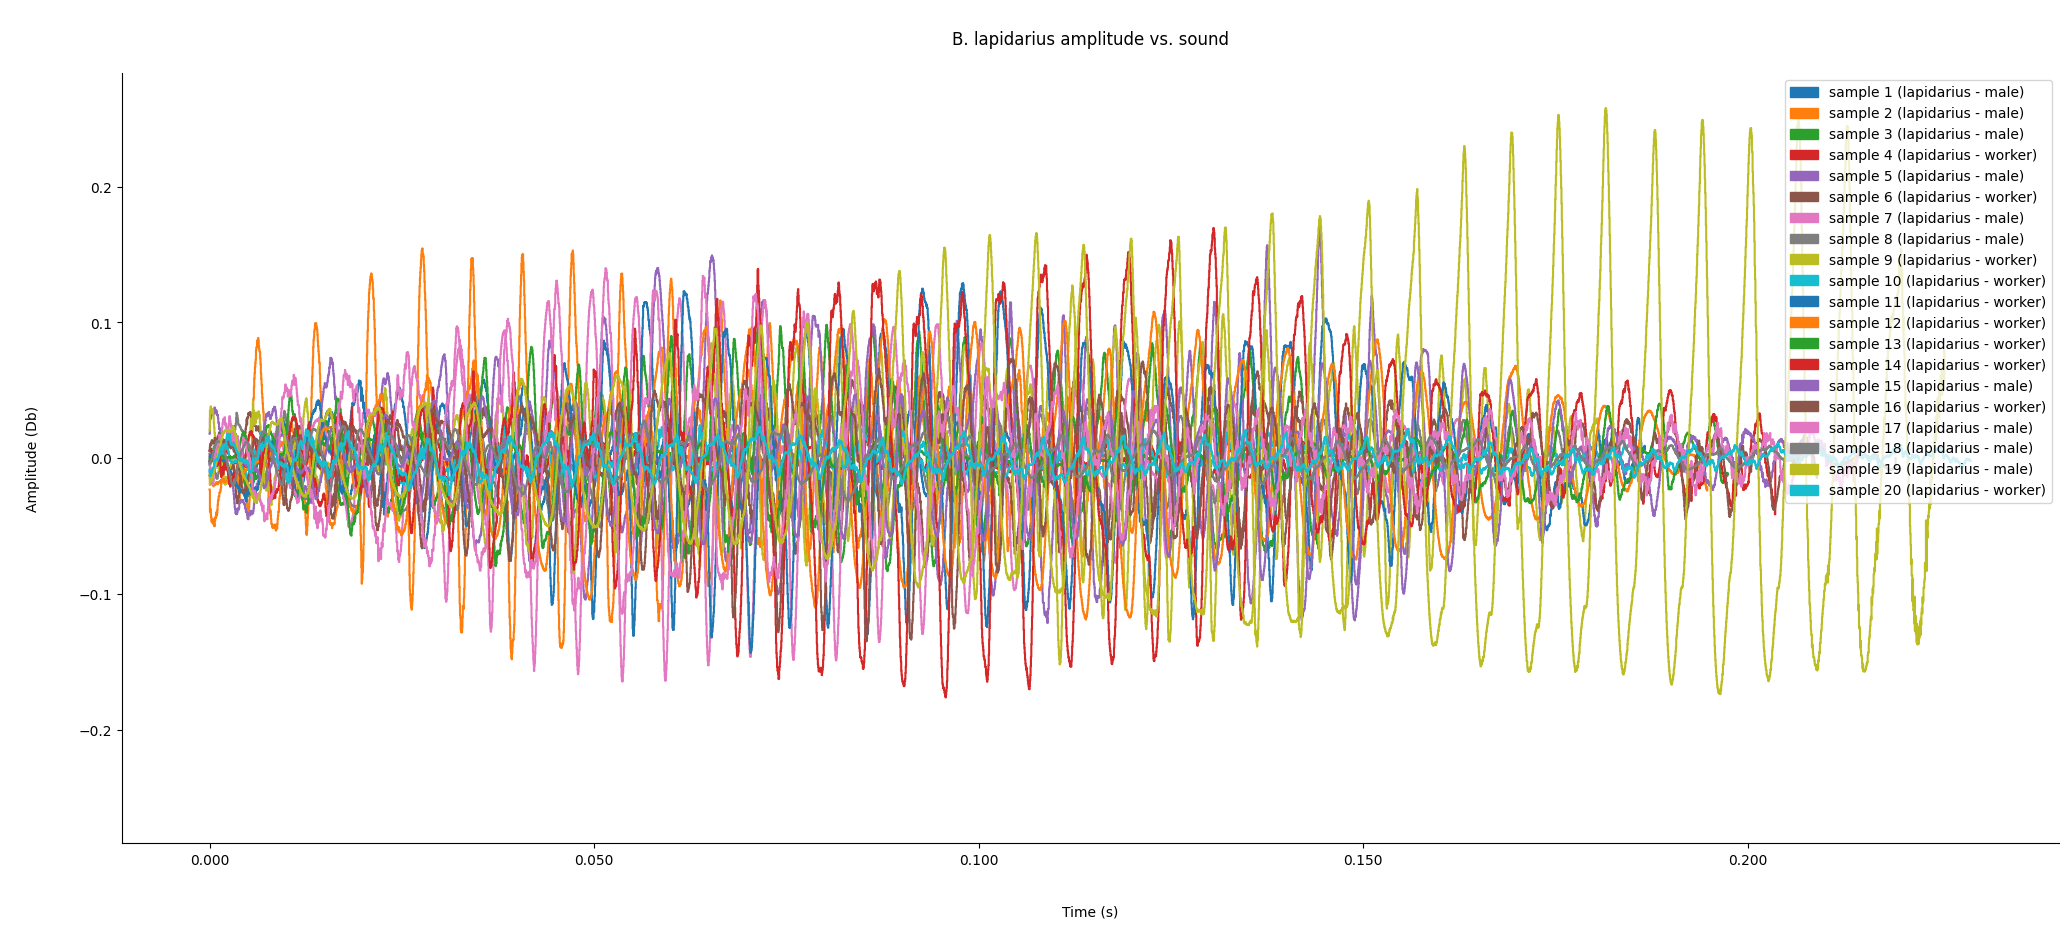

In [17]:
amplitude_vs_time(df_lapidarius, title="B. lapidarius amplitude vs. sound")

In [18]:
df_muscorum

title extension   species   caste      type  \
0        2020_07_31_muscorum_2_1       wav  muscorum  worker  Original   
1        2020_07_31_muscorum_1_2       wav  muscorum  worker  Original   
2   2020_08_12_muscorum_male_1_1       wav  muscorum    male  Original   
3   2020_08_12_muscorum_male_1_3       wav  muscorum    male  Original   
4        2020_07_31_muscorum_1_4       wav  muscorum  worker  Original   
5   2020_08_12_muscorum_male_1_2       wav  muscorum    male  Original   
6   2020_08_12_muscorum_male_1_5       wav  muscorum    male  Original   
7        2020_07_31_muscorum_1_1       wav  muscorum  worker  Original   
8   2020_08_12_muscorum_male_1_4       wav  muscorum    male  Original   
9        2020_07_31_muscorum_1_5       wav  muscorum  worker  Original   
10       2020_07_31_muscorum_1_3       wav  muscorum  worker  Original   

                                                                           location  \
0      A:\Thesis\data\cec\bombus\bombus_muscorum_worker\2020_07_31_muscorum_2_1.wav   
1      A:\Thesis\data\cec\bombus\bombus_muscorum_worker\2020_07_31_muscorum_1_2.wav   
2   A:\Thesis\data\cec\bombus\bombus_muscorum_male\2020_08_12_muscorum_male_1_1.wav   
3   A:\Thesis\data\cec\bombus\bombus_muscorum_male\2020_08_12_muscorum_male_1_3.wav   
4      A:\Thesis\data\cec\bombus\bombus_muscorum_worker\2020_07_31_muscorum_1_4.wav   
5   A:\Thesis\data\cec\bombus\bombus_muscorum_male\2020_08_12_muscorum_male_1_2.wav   
6   A:\Thesis\data\cec\bombus\bombus_muscorum_male\2020_08_12_muscorum_male_1_5.wav   
7      A:\Thesis\data\cec\bombus\bombus_muscorum_worker\2020_07_31_muscorum_1_1.wav   
8   A:\Thesis\data\cec\bombus\bombus_muscorum_male\2020_08_12_muscorum_male_1_4.wav   
9      A:\Thesis\data\cec\bombus\bombus_muscorum_worker\2020_07_31_muscorum_1_5.wav   
10     A:\Thesis\data\cec\bombus\bombus_muscorum_worker\2020_07_31_muscorum_1_3.wav   

    duration (s)  
0       0.197042  
1       0.230833  
2       0.247271  
3       0.272000  
4       0.308208  
5       0.365958  
6       0.426542  
7       0.567750  
8       0.576146  
9       0.641354  
10      0.894667

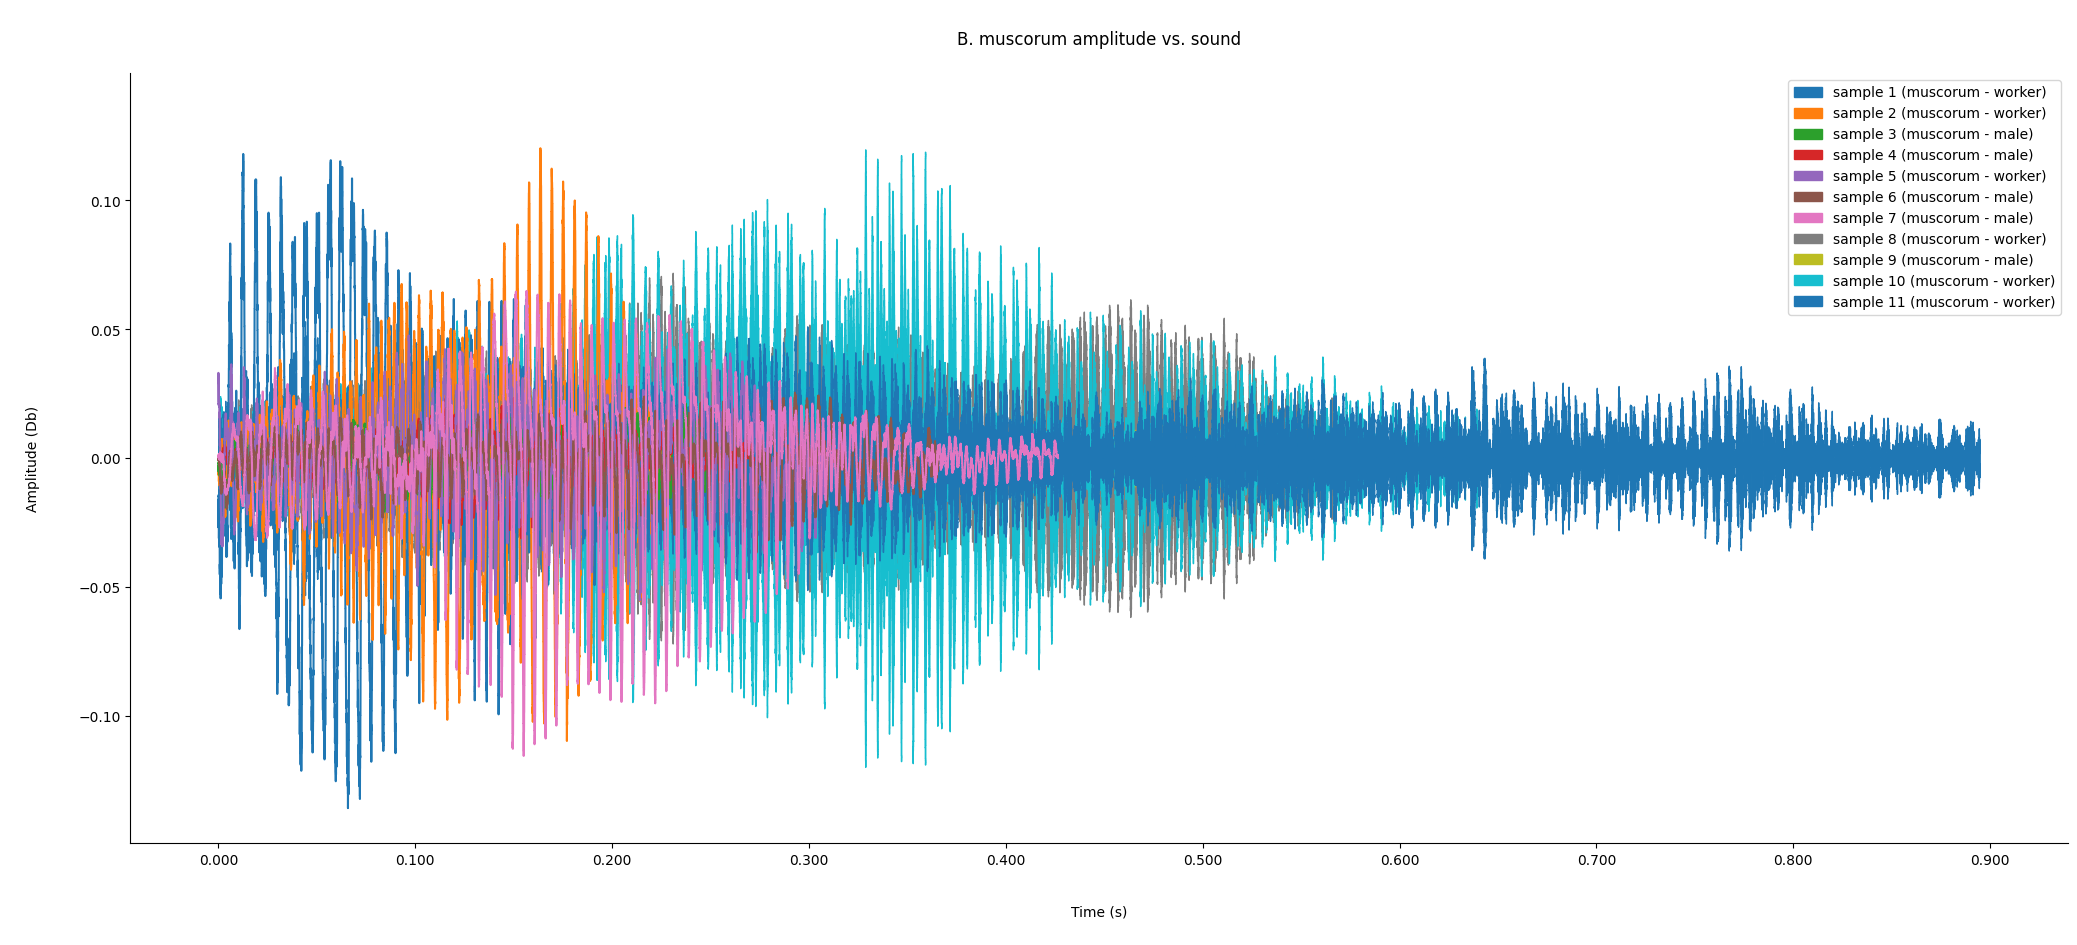

In [19]:
amplitude_vs_time(df_muscorum, title="B. muscorum amplitude vs. sound")

In [20]:
df_pascuorum

title extension    species   caste      type  \
0     2020_08_17_pascuorum_male_1_1       wav  pascuorum    male  Original   
1   2020_08_17_pascuorum_worker_5_1       wav  pascuorum  worker  Original   
2   2020_08_17_pascuorum_worker_2_1       wav  pascuorum  worker  Original   
3   2020_08_17_pascuorum_worker_4_3       wav  pascuorum  worker  Original   
4   2020_08_17_pascuorum_worker_5_2       wav  pascuorum  worker  Original   
5   2020_08_17_pascuorum_worker_1_2       wav  pascuorum  worker  Original   
6   2020_08_17_pascuorum_worker_4_2       wav  pascuorum  worker  Original   
7     2020_08_17_pascuorum_male_2_2       wav  pascuorum    male  Original   
8     2020_08_17_pascuorum_male_1_2       wav  pascuorum    male  Original   
9   2020_08_17_pascuorum_worker_4_1       wav  pascuorum  worker  Original   
10  2020_08_17_pascuorum_worker_1_4       wav  pascuorum  worker  Original   
11  2020_08_17_pascuorum_worker_1_3       wav  pascuorum  worker  Original   
12    2020_08_17_pascuorum_male_2_3       wav  pascuorum    male  Original   
13  2020_08_17_pascuorum_worker_2_2       wav  pascuorum  worker  Original   
14         2020_08_12_pascuorum_2_4       wav  pascuorum  worker  Original   
15         2020_08_12_pascuorum_2_1       wav  pascuorum  worker  Original   
16  2020_08_14_pascuorum_worker_1_1       wav  pascuorum  worker  Original   
17  2020_08_17_pascuorum_worker_2_3       wav  pascuorum  worker  Original   
18         2020_08_12_pascuorum_2_3       wav  pascuorum  worker  Original   
19  2020_08_17_pascuorum_worker_1_1       wav  pascuorum  worker  Original   
20  2020_08_14_pascuorum_worker_1_2       wav  pascuorum  worker  Original   
21    2020_08_17_pascuorum_male_2_1       wav  pascuorum    male  Original   
22         2020_08_12_pascuorum_2_2       wav  pascuorum  worker  Original   
23         2020_08_12_pascuorum_1_1       wav  pascuorum  worker  Original   

                                                                                 location  \
0       A:\Thesis\data\cec\bombus\bombus_pascuorum_male\2020_08_17_pascuorum_male_1_1.wav   
1   A:\Thesis\data\cec\bombus\bombus_pascuorum_worker\2020_08_17_pascuorum_worker_5_1.wav   
2   A:\Thesis\data\cec\bombus\bombus_pascuorum_worker\2020_08_17_pascuorum_worker_2_1.wav   
3   A:\Thesis\data\cec\bombus\bombus_pascuorum_worker\2020_08_17_pascuorum_worker_4_3.wav   
4   A:\Thesis\data\cec\bombus\bombus_pascuorum_worker\2020_08_17_pascuorum_worker_5_2.wav   
5   A:\Thesis\data\cec\bombus\bombus_pascuorum_worker\2020_08_17_pascuorum_worker_1_2.wav   
6   A:\Thesis\data\cec\bombus\bombus_pascuorum_worker\2020_08_17_pascuorum_worker_4_2.wav   
7       A:\Thesis\data\cec\bombus\bombus_pascuorum_male\2020_08_17_pascuorum_male_2_2.wav   
8       A:\Thesis\data\cec\bombus\bombus_pascuorum_male\2020_08_17_pascuorum_male_1_2.wav   
9   A:\Thesis\data\cec\bombus\bombus_pascuorum_worker\2020_08_17_pascuorum_worker_4_1.wav   
10  A:\Thesis\data\cec\bombus\bombus_pascuorum_worker\2020_08_17_pascuorum_worker_1_4.wav   
11  A:\Thesis\data\cec\bombus\bombus_pascuorum_worker\2020_08_17_pascuorum_worker_1_3.wav   
12      A:\Thesis\data\cec\bombus\bombus_pascuorum_male\2020_08_17_pascuorum_male_2_3.wav   
13  A:\Thesis\data\cec\bombus\bombus_pascuorum_worker\2020_08_17_pascuorum_worker_2_2.wav   
14         A:\Thesis\data\cec\bombus\bombus_pascuorum_worker\2020_08_12_pascuorum_2_4.wav   
15         A:\Thesis\data\cec\bombus\bombus_pascuorum_worker\2020_08_12_pascuorum_2_1.wav   
16  A:\Thesis\data\cec\bombus\bombus_pascuorum_worker\2020_08_14_pascuorum_worker_1_1.wav   
17  A:\Thesis\data\cec\bombus\bombus_pascuorum_worker\2020_08_17_pascuorum_worker_2_3.wav   
18         A:\Thesis\data\cec\bombus\bombus_pascuorum_worker\2020_08_12_pascuorum_2_3.wav   
19  A:\Thesis\data\cec\bombus\bombus_pascuorum_worker\2020_08_17_pascuorum_worker_1_1.wav   
20  A:\Thesis\data\cec\bombus\bombus_pascuorum_worker\2020_08_14_pascuorum_worker_1_2.wav   
21      A:\Thesis\data\cec\bombus

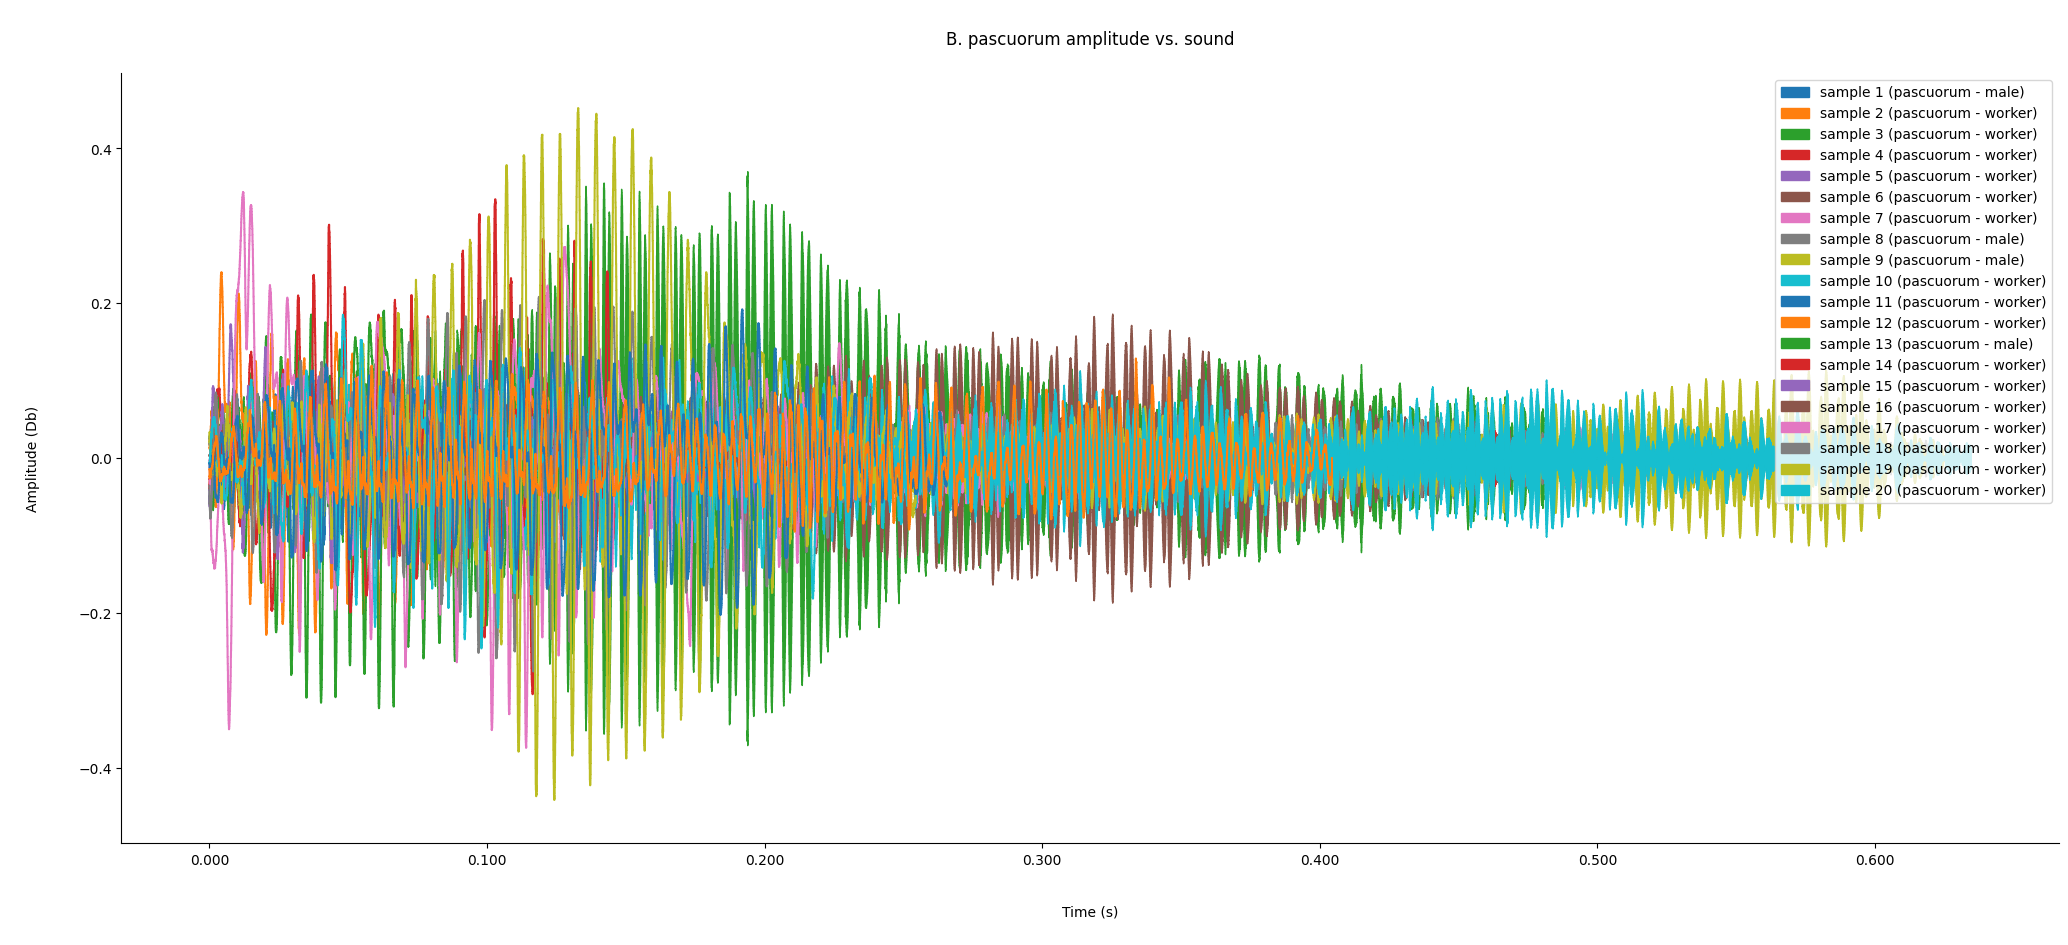

In [21]:
amplitude_vs_time(df_pascuorum, title="B. pascuorum amplitude vs. sound")

In [22]:
df_soroeensis

title extension     species   caste      type  \
0  S1208W01_soroensis_1_00       wav  soroeensis  worker  Original   
1     S1208W01_soroensis_2       wav  soroeensis  worker  Original   

                                                                         location  \
0  A:\Thesis\data\cec\bombus\bombus_soroeensis_worker\S1208W01_soroensis_1_00.wav   
1     A:\Thesis\data\cec\bombus\bombus_soroeensis_worker\S1208W01_soroensis_2.wav   

   duration (s)  
0      0.251792  
1      1.711542

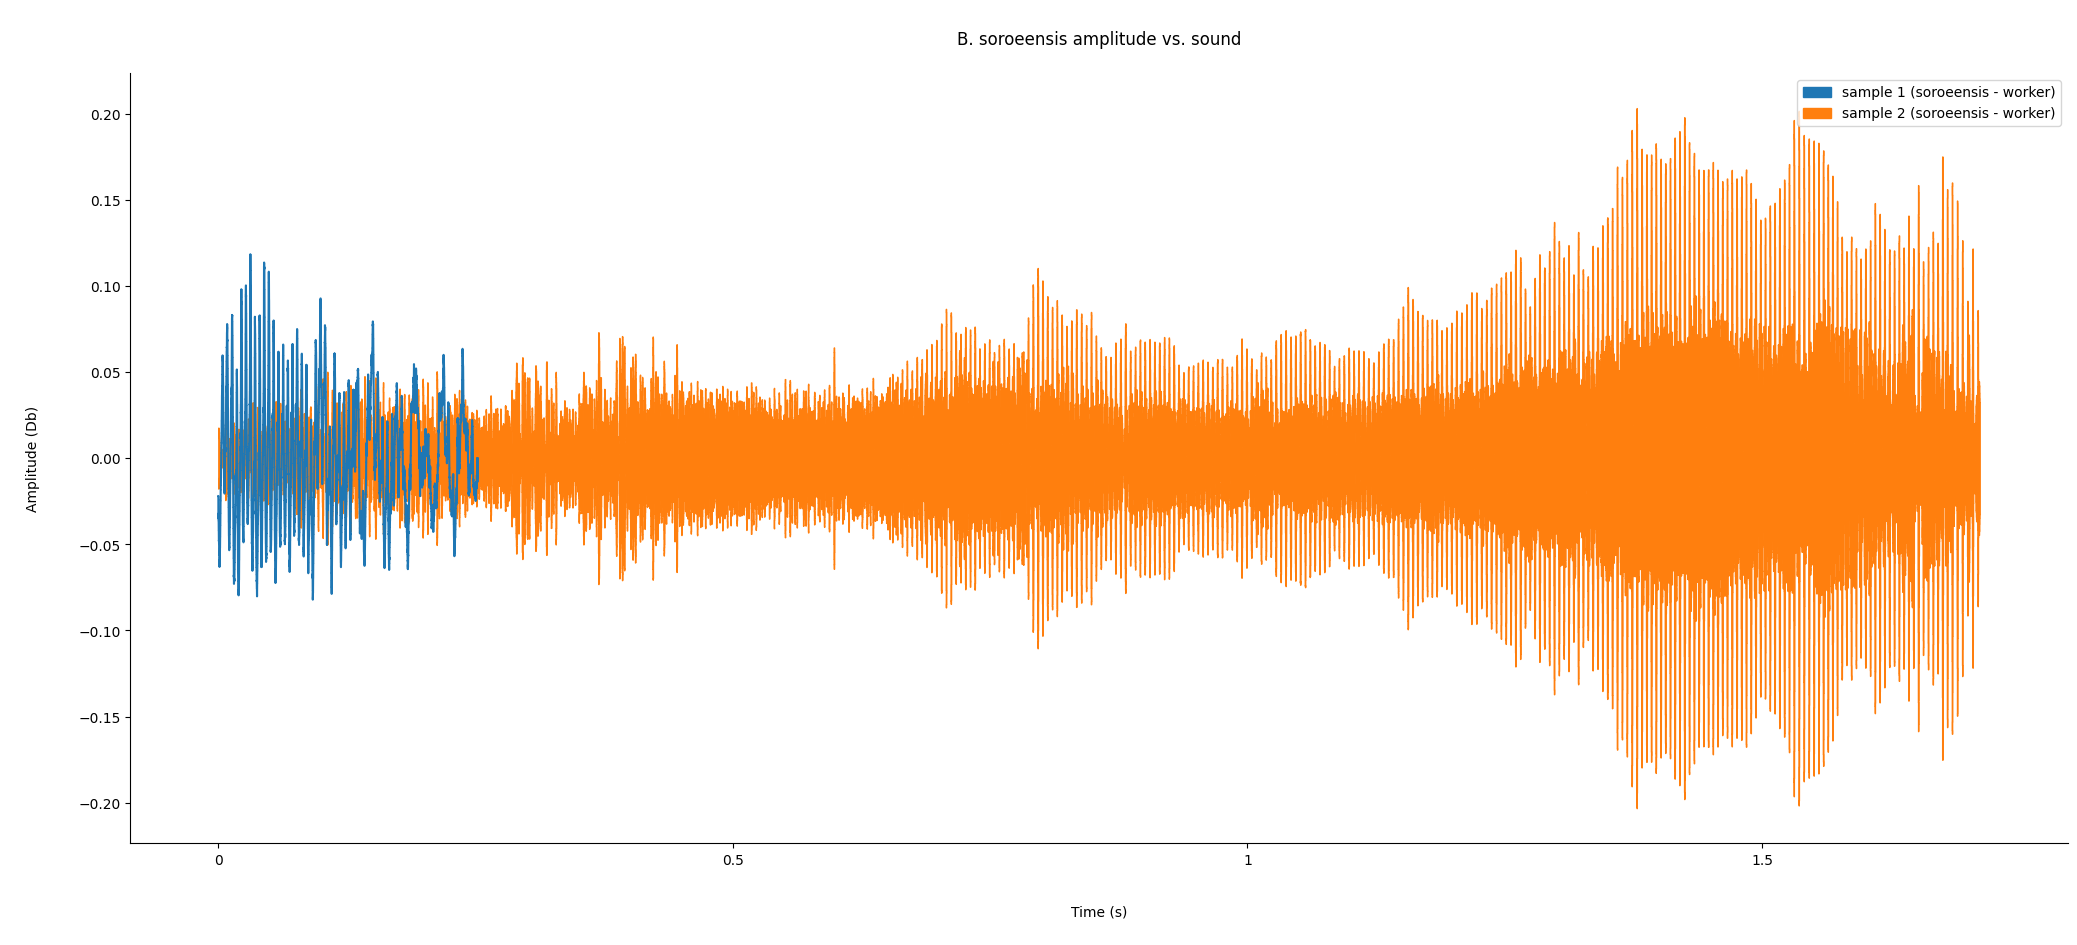

In [23]:
amplitude_vs_time(df_soroeensis, title="B. soroeensis amplitude vs. sound")

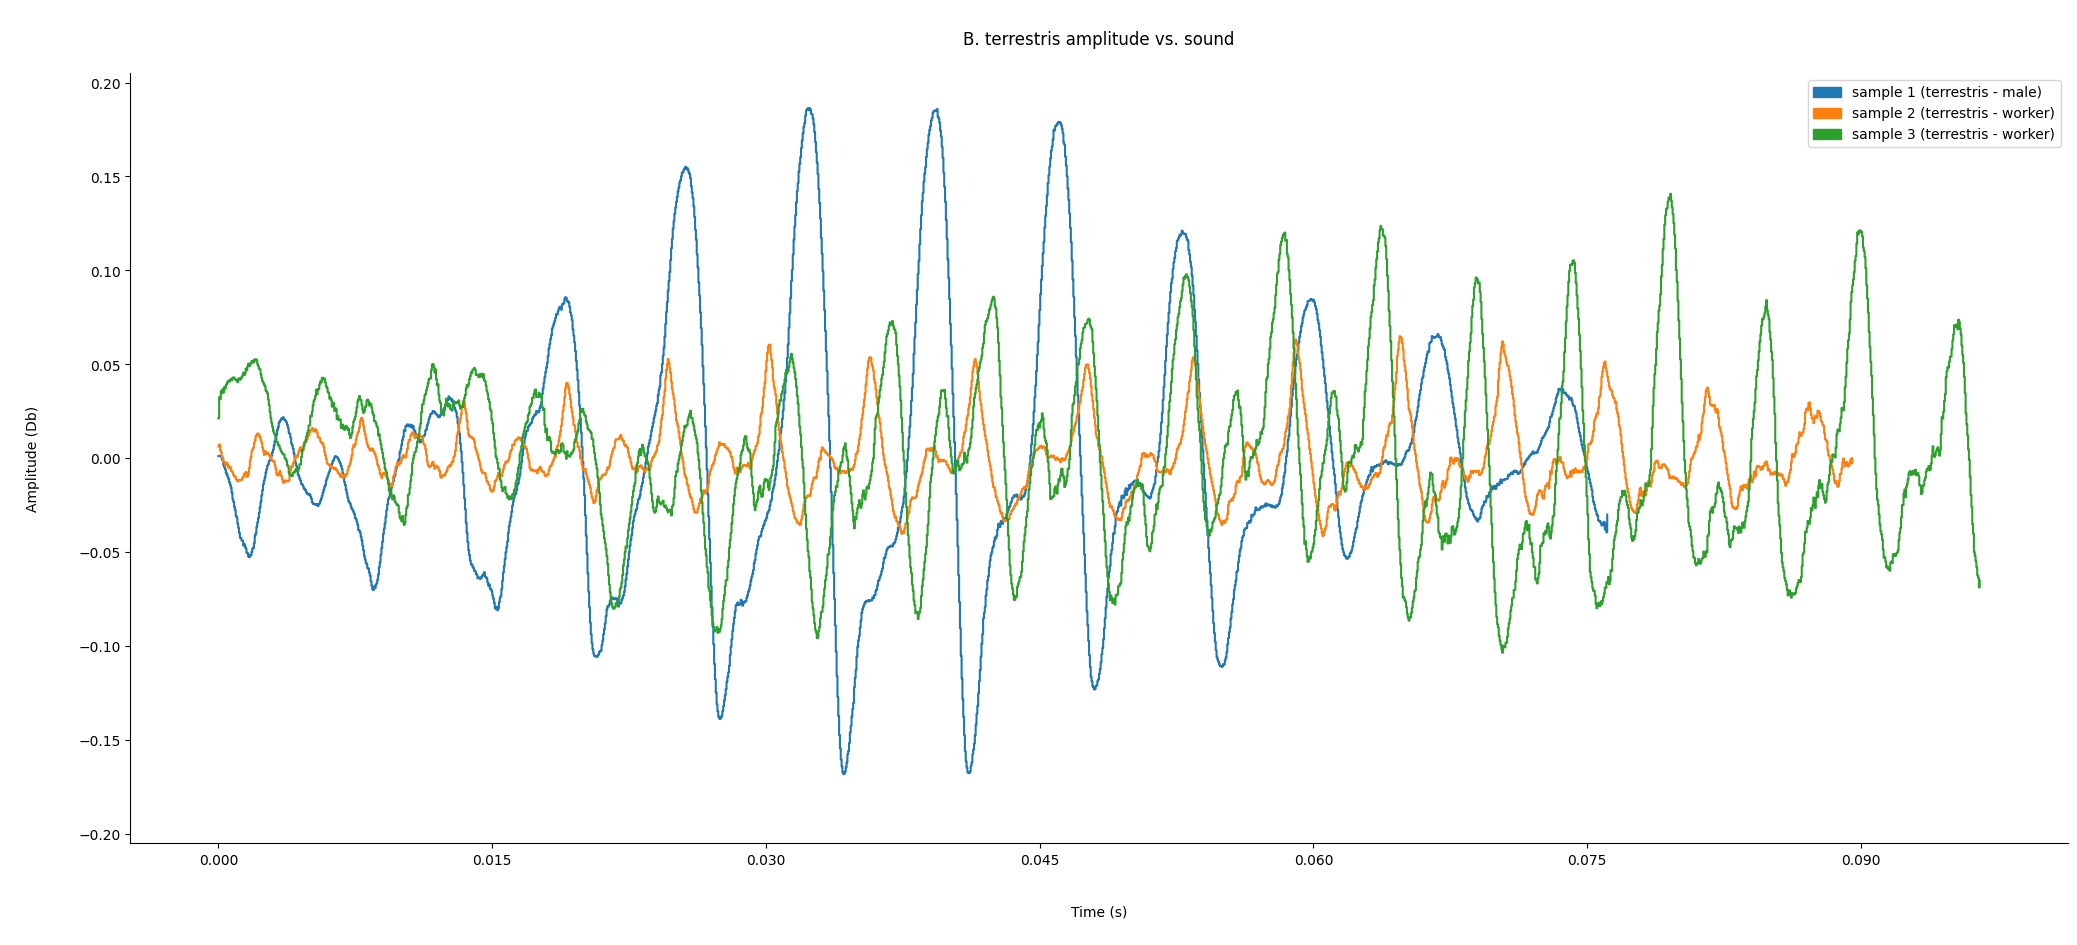

In [24]:
amplitude_vs_time(df_terrestris, title="B. terrestris amplitude vs. sound", start_index=0, end_index=3)

In [25]:
df_2 = df[(df['duration (s)'] > 0.5)].reset_index(drop=True)
df_2

title extension     species   caste  \
0                                    5       wav  lapidarius  worker   
1                                    4       wav  terrestris  worker   
2       2020_08_17_sylvarum_worker_3_3       wav    sylvarum  worker   
3    2020_08_03_terrestris_worker_10_3       wav  terrestris  worker   
4     2020_08_02_lapidarius_queen_1_11       wav  lapidarius   queen   
..                                 ...       ...         ...     ...   
215   2020_08_02_terrestris_worker_5_4       wav  terrestris  worker   
216              S1208W02_terrestris_4       wav  terrestris  worker   
217     2020_08_12_hortorum_worker_1_1       wav    hortorum  worker   
218              S1708W05_terrestris_7       wav  terrestris  worker   
219             S1208W03_terrestris_12       wav  terrestris  worker   

         type  \
0    Original   
1    Original   
2    Original   
3    Original   
4    Original   
..        ...   
215  Original   
216  Original   
217  Original   
218  Original   
219  Original   

                                                                                     location  \
0                                    A:\Thesis\data\cec\bombus\bombus_lapidarius_worker\5.wav   
1                                    A:\Thesis\data\cec\bombus\bombus_terrestris_worker\4.wav   
2         A:\Thesis\data\cec\bombus\bombus_sylvarum_worker\2020_08_17_sylvarum_worker_3_3.wav   
3    A:\Thesis\data\cec\bombus\bombus_terrestris_worker\2020_08_03_terrestris_worker_10_3.wav   
4      A:\Thesis\data\cec\bombus\bombus_lapidarius_queen\2020_08_02_lapidarius_queen_1_11.wav   
..                                                                                        ...   
215   A:\Thesis\data\cec\bombus\bombus_terrestris_worker\2020_08_02_terrestris_worker_5_4.wav   
216              A:\Thesis\data\cec\bombus\bombus_terrestris_worker\S1208W02_terrestris_4.wav   
217       A:\Thesis\data\cec\bombus\bombus_hortorum_worker\2020_08_12_hortorum_worker_1_1.wav   
218              A:\Thesis\data\cec\bombus\bombus_terrestris_worker\S1708W05_terrestris_7.wav   
219             A:\Thesis\data\cec\bombus\bombus_terrestris_worker\S1208W03_terrestris_12.wav   

     duration (s)  
0        0.501458  
1        0.501583  
2        0.503083  
3        0.507062  
4        0.507167  
..            ...  
215      2.387333  
216      5.622167  
217     10.192000  
218     18.494667  
219     93.150667  

[220 rows x 7 columns]

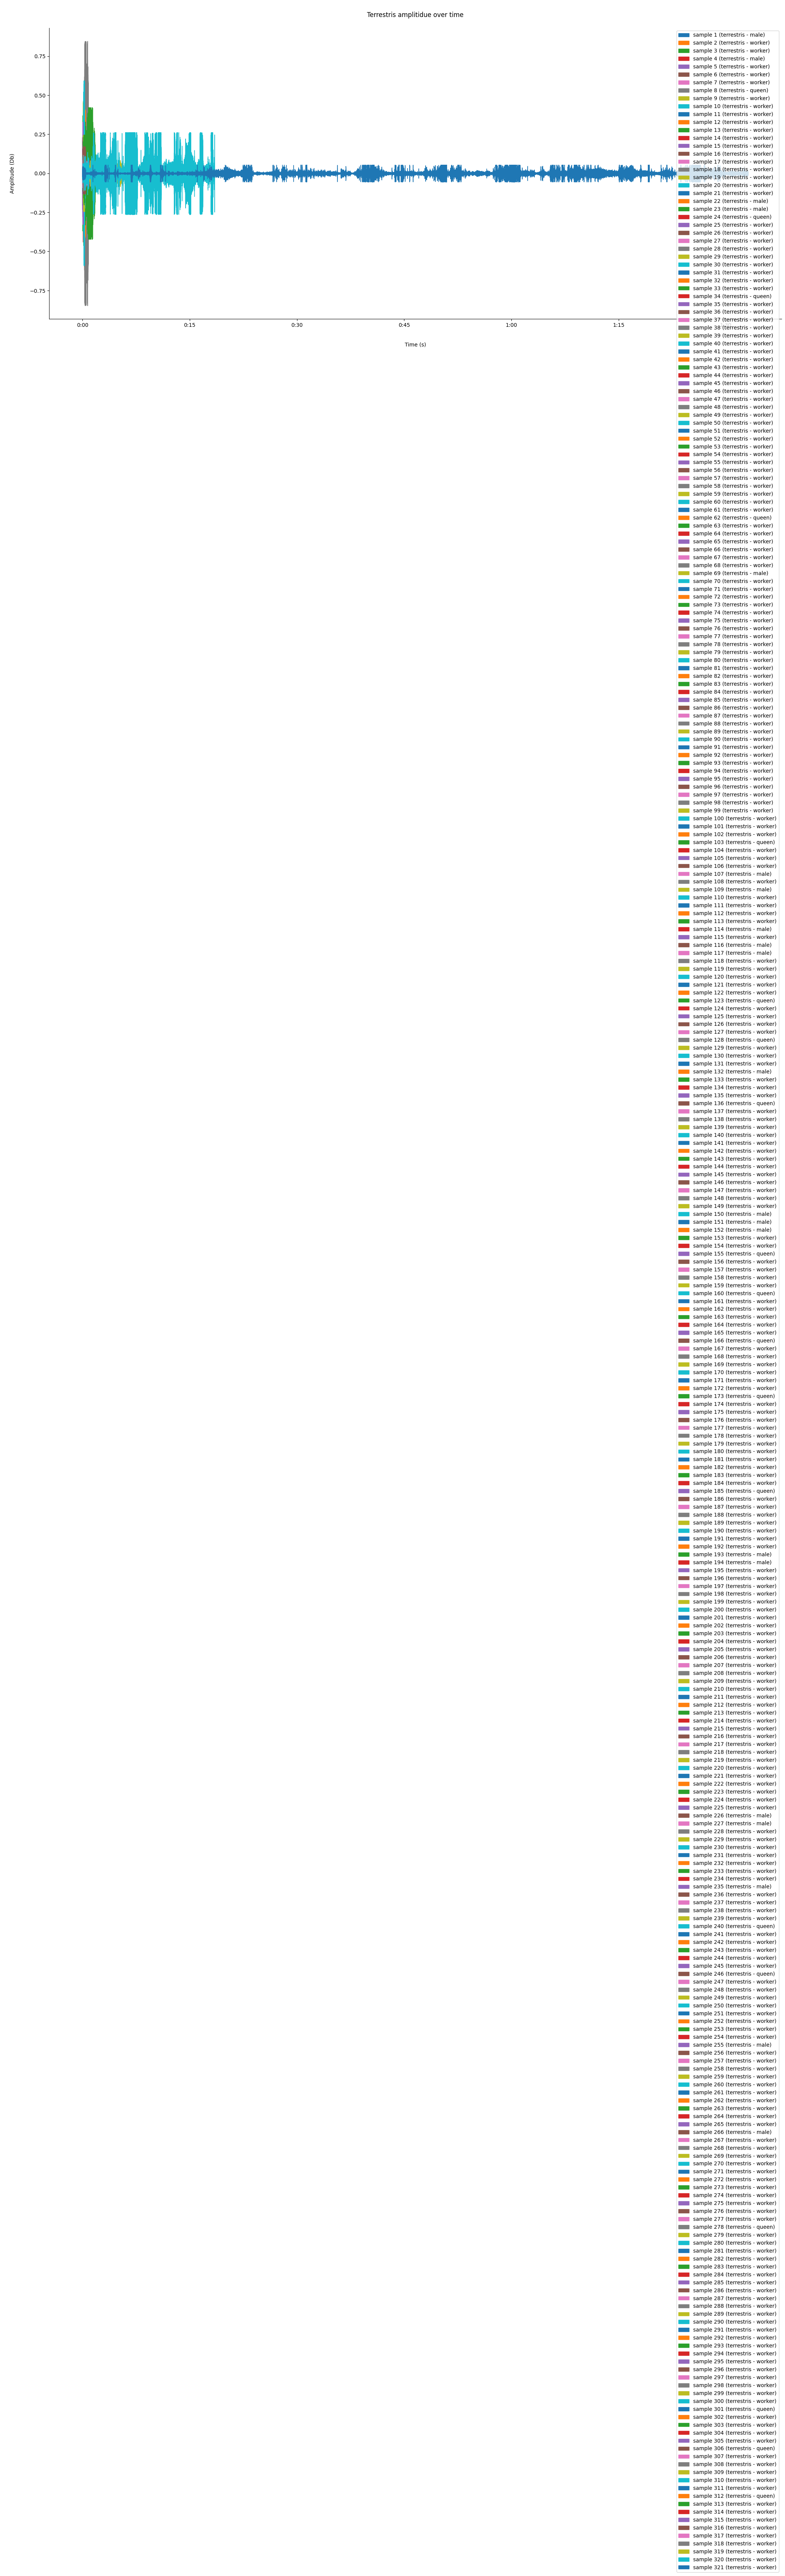

In [26]:
amplitude_vs_time(data=df_terrestris, title="Terrestris amplitidue over time", filter=True, start_index=0, end_index=len(df_terrestris), coeff=3, save=True)